In [228]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

In [229]:
defaults = pd.read_csv("DefualtData/UCI_Credit_card.csv")
defaults.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [230]:
defaults = defaults.drop(['ID'],axis=1) #Dropping irrelevant data

In [231]:
defaults = defaults.rename(columns={"PAY_0":"PAY_1","default.payment.next.month":"default"})

In [232]:
duplicate_rows_defaults = defaults[defaults.duplicated] 
print("number of duplicate rows: ", duplicate_rows_defaults.shape) #Checking For Duplicates

number of duplicate rows:  (35, 24)


In [233]:
print(defaults.isnull().sum()) #Find Missing Data

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [234]:
defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [235]:
defaults.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


C:\Users\manch\AppData\Local\Temp\ipykernel_8240\2399810796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default',data=defaults, palette=['green', 'red'])


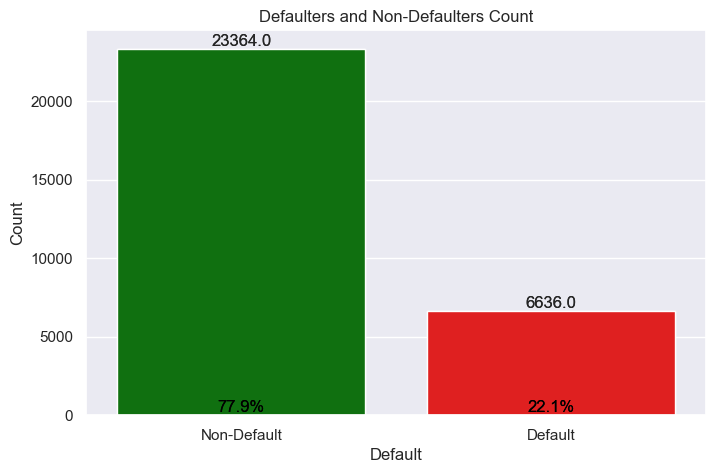

In [236]:
#Plotting the total number of defaulters vs non defaulters
plt.figure(figsize=(8,5))
ax = sns.countplot(x='default', data=defaults)
sns.countplot(x='default',data=defaults, palette=['green', 'red'])
plt.title("Defaulters and Non-Defaulters Count")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Default', 'Default'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(defaults))
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., 0), ha='center', va='bottom', fontsize=12, color='black')

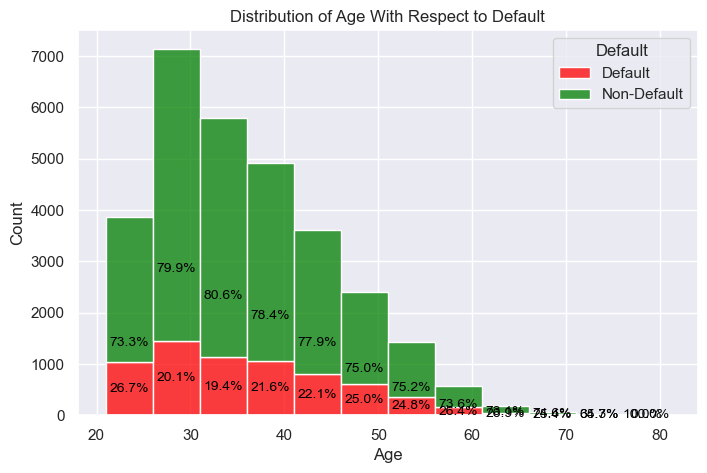

In [237]:
#Plotting the distribution of Default with respect to Age
plt.figure(figsize=(8,5))
bin_edgees = range(defaults['AGE'].min(), defaults['AGE'].max() + 5, 5) #Setting the bin edges for age
ax = sns.histplot(data=defaults, x='AGE', hue='default', multiple="stack", bins=bin_edgees, palette=['green', 'red'])
plt.title("Distribution of Age With Respect to Default")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Default', labels=['Default', 'Non-Default'])
#add percentage labels to the bars based on defaults in that one age range
for p in ax.patches:
    bin_total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
    if bin_total > 0:  # Avoid division by zero
        percentage = '{:.1f}%'.format(100 * p.get_height() / bin_total)
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                    ha='center', va='center', fontsize=10, color='black')
plt.show()

Younger debtors (Age 20-25) have the highest rate of defaulting. Older creditors from 25-35 have a lower rate of defaulting. The rate of defaulting increases with age beyond this point.

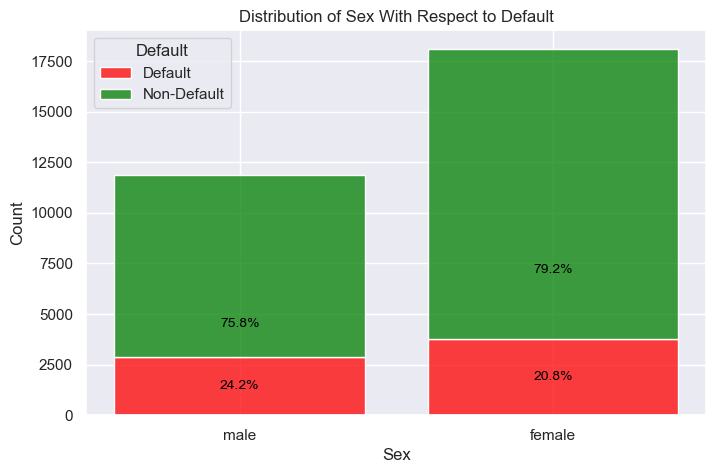

In [ ]:
#Plotting the distribution of Gender with respect to Default
plt.figure(figsize=(8,5))
ax = sns.histplot(data=defaults, x = 'SEX', hue='default', multiple="stack", shrink=0.8, palette=['green', 'red'], discrete=True)
plt.title("Distribution of Sex With Respect to Default")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks([1, 2], ['male','female'])
plt.legend(title='Default', labels=['Default', 'Non-Default'])

for p in ax.patches:
    bin_total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
    if bin_total > 0:  # Avoid division by zero
        percentage = '{:.1f}%'.format(100 * p.get_height() / bin_total)
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                    ha='center', va='center', fontsize=10, color='black')


This dataset contains a higher proportion of women compared to men. Men exhibit a higher default rate.

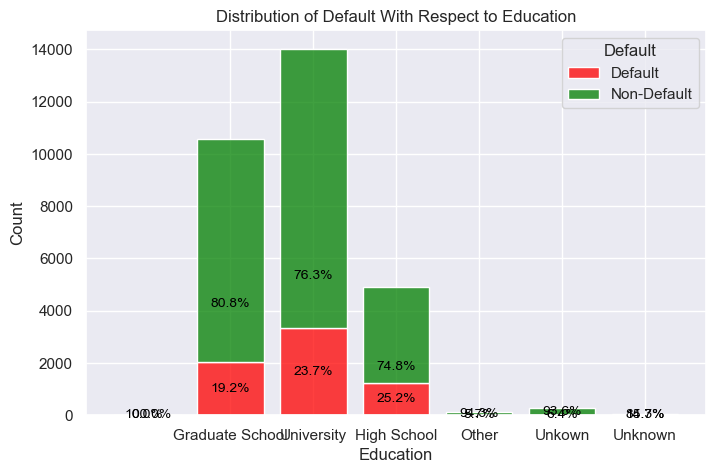

In [ ]:
#Plotting the distribution of Default with respect to Education
plt.figure(figsize=(8,5))
ax = sns.histplot(data=defaults, x = 'EDUCATION', hue='default', multiple="stack", shrink=0.8, palette=['green', 'red'], discrete=True)
plt.title("Distribution of Default With Respect to Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5, 6], ['Graduate School','University','High School','Other','Unknown','Unknown']) #EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.legend(title='Default', labels=['Default', 'Non-Default'])

for p in ax.patches:
    bin_total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
    if bin_total > 0:  # Avoid division by zero
        percentage = '{:.1f}%'.format(100 * p.get_height() / bin_total)
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                    ha='center', va='center', fontsize=10, color='black')


Those with higher levels of education have a lower rate of defaulting.

Text(0.5, 1.0, 'Correlation Heatmap')

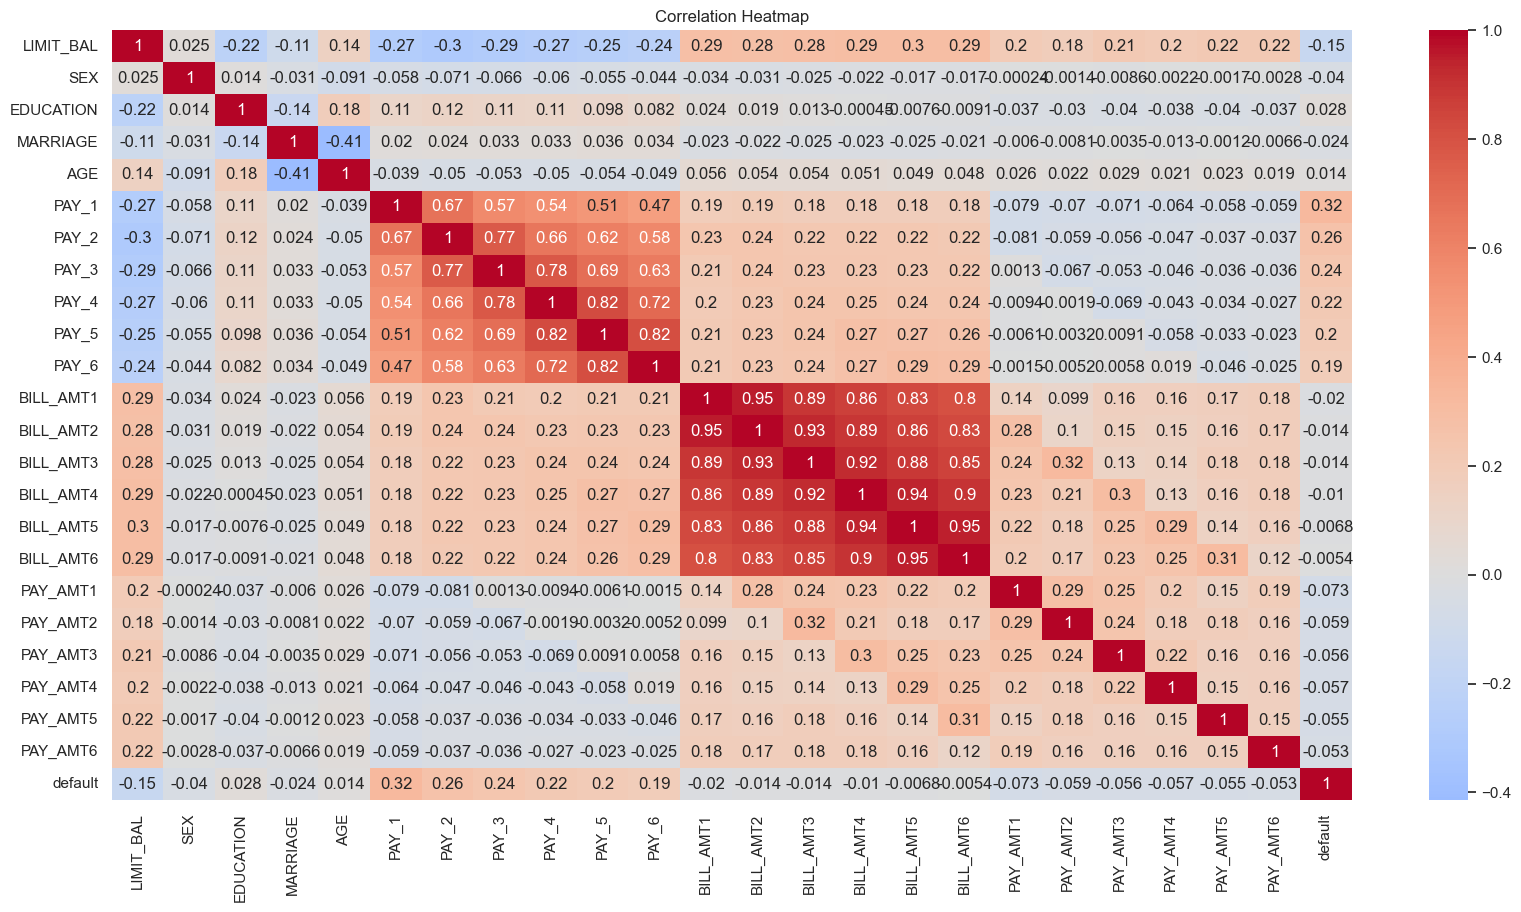

In [246]:
plt.figure(figsize=(20,10))
c=defaults.corr()
sns.heatmap(c, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")

Highest correlation lies on the Repayment statuses, higher correlation the closer it gets to October, PAY_1 or Setember repayment status being the clossest

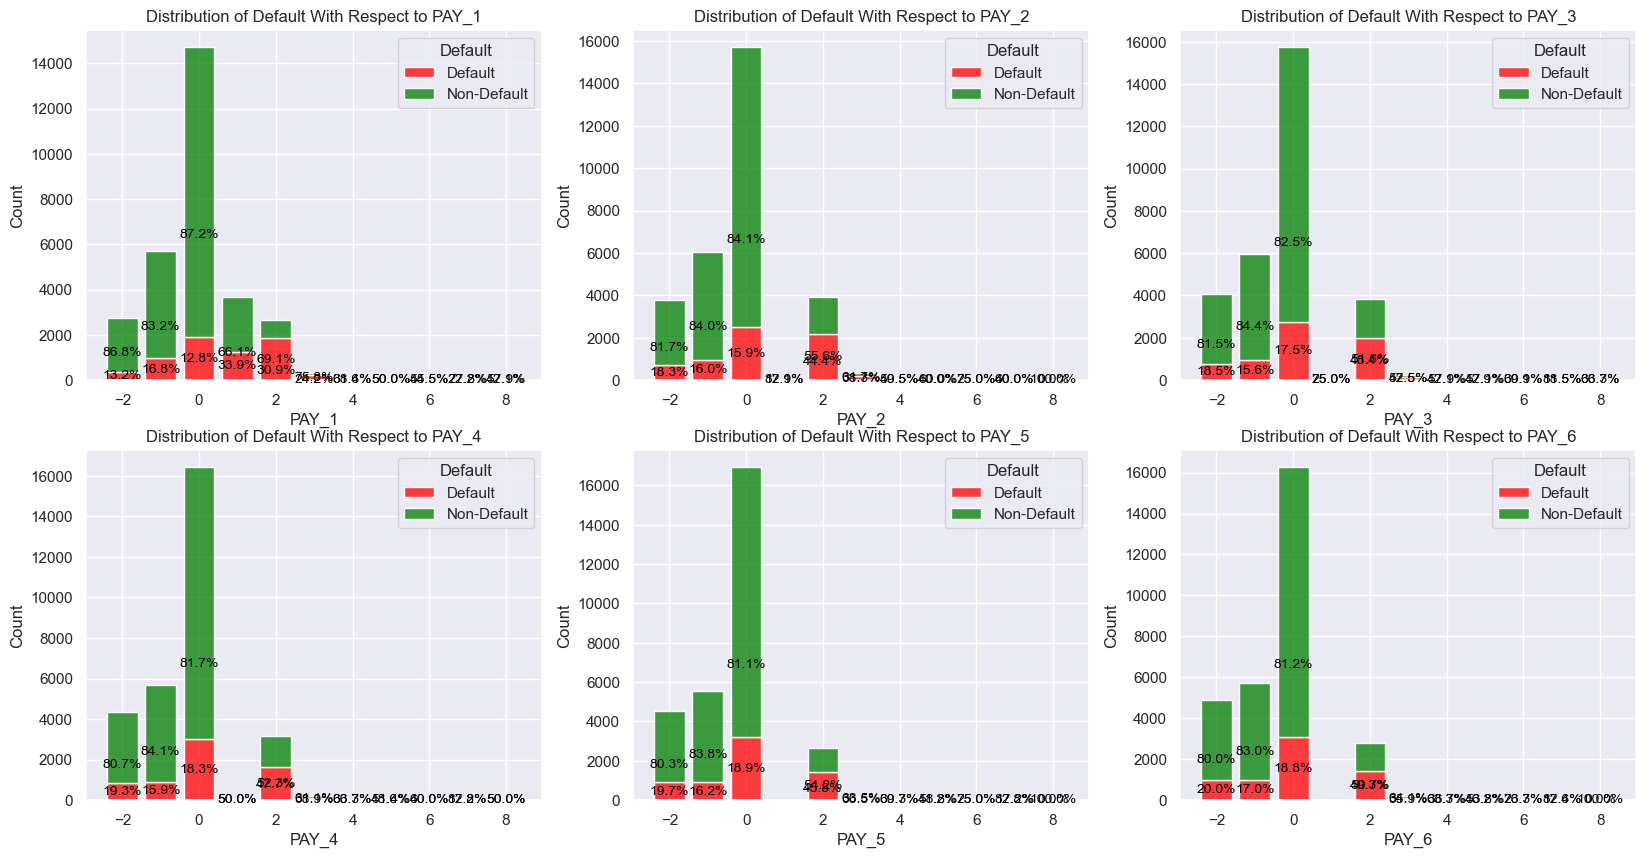

In [268]:
#Plotting the distribution of Default with respect to payment status of each month
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
payment_status_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i, col in enumerate(payment_status_columns):
    ax = sns.histplot(data=defaults, x=col, hue='default', multiple="stack", shrink=0.8, palette=['green', 'red'], discrete=True, ax=axes[i])
    ax.set_title(f"Distribution of Default With Respect to {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title='Default', labels=['Default', 'Non-Default'])
    
    for p in ax.patches:
        bin_total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == p.get_x()])
        if bin_total > 0:  # Avoid division by zero
            percentage = '{:.1f}%'.format(100 * p.get_height() / bin_total)
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                        ha='center', va='center', fontsize=10, color='black')